# Project - Acquire and Prepare Data from Web

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieve the data ```tables = pd.read_html(url)```
- Assign the first DataFrame to a variable
    - HINT: ```tables``` is a list DataFrame containing all the data

#### Option 2: From csv file (if option 1 fails)
- Use ```pd.read_csv()``` to read the file `files/fundraising.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [3]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"
tables = pd.read_html(url)


In [39]:
data = tables[0]
data

,Revenue,Expenses,Asset rise,Total assets,Rev,Exp,Asr,T Assets
Year,,,,,,,,
2003/2004,80129,23463,56666,56666,80129,23463,56666,56666
2004/2005,379088,177670,211418,268084,379088,177670,211418,268084
2005/2006,1508039,791907,736132,1004216,1508039,791907,736132,1004216
2006/2007,2734909,2077843,654066,1658282,2734909,2077843,654066,1658282
2007/2008,5032981,3540724,3519886,5178168,5032981,3540724,3519886,5178168
2008/2009,8658006,5617236,3053599,8231767,8658006,5617236,3053599,8231767
2009/2010,17979312,10266793,6310964,14542731,17979312,10266793,6310964,14542731
2010/2011,24785092,17889794,9649413,24192144,24785092,17889794,9649413,24192144
2011/2012,38479665,29260652,10736914,34929058,38479665,29260652,10736914,34929058


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [13]:
data.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().any()```

In [14]:
data.isna().any()

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations
- You can delete it by 
    - ```del data['Source']```

In [17]:
del data['Source']

### Step 2.d: Convert Year column to numeric
- All the strings in years are formatted: 'YYYY/YYYY'
- To get the last year as string: ```data['Year'].str[-4:]```
- To convert that to numeric use: ```pd.to_numeric(...)```
    - HINT: You can assign the column directly

In [18]:
data['Year'].str[-4]

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
Name: Year, dtype: object

In [19]:
pd.to_numeric(data['Year'].str[-4])

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
Name: Year, dtype: int64

### Step 2.e: Set Year to index
- To change a column to be the index use: ```data.set_index('Year', inplace=True)```
- Also sort the index in correct order: ```data.sort_index(inplace=True)```

In [20]:
data.set_index('Year', inplace=True)

In [21]:
data.sort_index(inplace=True)

### Step 2.f: Convert the remaining columns to numeric
- Remember the steps from the lesson
    - ```.str[2:]``` to remove the first two characters ('\$ ')
    - ```.str.replace(',', '')``` to remove commas
    - ```pd.to_numeric(...)``` converts string (containing well-formed number) to the numeric value
- Try to do it directly column by column

In [44]:
data['Revenue'] = pd.to_numeric(data['Revenue'].str[2:].str.replace(',', ''))
data['Expenses'] = pd.to_numeric(data['Expenses'].str[2:].str.replace(',', ''))
data['Asset rise'] = pd.to_numeric(data['Asset rise'].str[2:].str.replace(',', ''))
data['Total assets'] = pd.to_numeric(data['Total assets'].str[2:].str.replace(',', ''))

AttributeError: Can only use .str accessor with string values!

### Step 2.g: Visualize data to investigate quality
- Make a simple plot of **Revenue**, **Expenses** and **Total assets**
- This will help you spot any outliers

<AxesSubplot:xlabel='Year'>

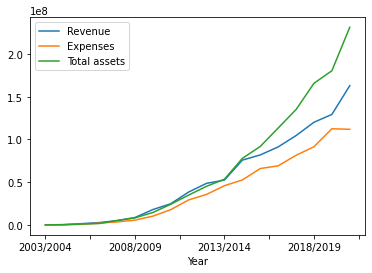

In [41]:
data[['Revenue', 'Expenses', 'Total assets']].plot()

In [42]:
data.head()

,Revenue,Expenses,Asset rise,Total assets,Rev,Exp,Asr,T Assets
Year,,,,,,,,
2003/2004,80129,23463,56666,56666,80129,23463,56666,56666
2004/2005,379088,177670,211418,268084,379088,177670,211418,268084
2005/2006,1508039,791907,736132,1004216,1508039,791907,736132,1004216
2006/2007,2734909,2077843,654066,1658282,2734909,2077843,654066,1658282
2007/2008,5032981,3540724,3519886,5178168,5032981,3540724,3519886,5178168


### Step 2.h: Visualize data to investigate quality
- Make a simple plot of **Asset rise**
- This will help you spot any outliers

<AxesSubplot:xlabel='Year'>

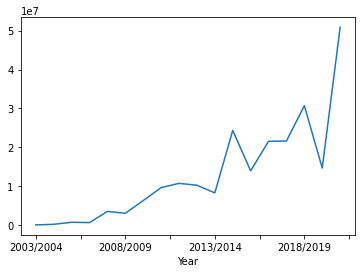

In [43]:
data['Asset rise'].plot()